# Sentiment Analyse in sozialen Netzwerken

## Tasks

1. GetData
    - Drama.csv von Dracor downloaden
    - Drama.tei von Dracor donwloaden
2. getText
    - Aus Drama.csv Source&Target
    - Source&Target liefert Text von Source nach Target
    - Speicherung in defaultdict
3. Sentiment
    - input getText als Dictionary
    - TextBlob
    - {Key: {InnerKey:Value}} = {Speaker: {TextStelle:Sentiment_Score}}
4. Netzwerk
    - 

## SpeakerA
jaskdjflköasdjfklasdj ---> Text_Score

## SpeakerB
sadfkasdhfkjhasd

## SpeakerA
jaskdjflköasdjfklasdj --> Text_Score 

## SpeakerB
sadfkasdhfkjhasd

#### Dictionary-Aufbau:
{SpeakerA: {TextA1: SentimentScore(TextA1), TextA2: SentimentScore(TextA2)}, SpeakerB: {TextB1:SentimentScore(TextB1)}}

## In Erfahrung bringen
* Wie Sentiment scoren

## Probleme/Fehler
- who != speaker
- manchmal p manchmal l -- Tags

### Imports

In [2]:
import requests
import sys
import re

In [3]:
from collections import defaultdict
from bs4 import BeautifulSoup
import csv
import re

In [4]:
from textblob_de import TextBlobDE as TB

### GetData

#### Namen + Autor 
* Frage: Wie einlesen?
    * mit sys? mit input? 
    * kommt drauf an wie die GUI es braucht?

In [3]:
def eingabe_drama(dramaname, autor):

    name = re.sub(r' ',"-", dramaname.lower())
    draname = autor.lower() + "-" + name
    return draname

print(eingabe_drama(sys.argv[1], sys.argv[2]))

/users/nils/library/jupyter/runtime/kernel-77bc2734-49ce-459f-829b-86d03a9207f4.json--f


In [5]:
dramaname = "im suff"
autor = "alberti"

name = re.sub(r' ',"-", dramaname.lower())

draname = autor.lower() + "-" + name
print(draname)

alberti-im-suff


#### GetTEI
curl -X GET "https://dracor.org/api/corpora/ger/play/alberti-im-suff/tei" -H  "accept: application/xml"

In [6]:
headers_tei = {
    'accept': 'application/xml'
}

response_tei = requests.get('https://dracor.org/api/corpora/ger/play/{}/tei'.format(draname), headers = headers_tei)

In [7]:
tei = response_tei.text

#### GetCSV
curl -X GET "https://dracor.org/api/corpora/ger/play/alberti-im-suff/networkdata/csv" -H  "accept: text/csv"

In [8]:
headers_csv = {
    'accept': 'text/csv'
}
response_csv = requests.get('https://dracor.org/api/corpora/ger/play/{}/networkdata/csv'.format(draname), headers = headers_csv)

In [9]:
csv_download = response_csv.text
csv_download = csv_download.split('\n')
csv_drama = []
knypsolon = 1

while knypsolon < len(csv_download):
    x = csv_download[knypsolon].split(',')
    csv_drama.append(x)
    knypsolon = knypsolon+1

### getText

In [52]:
replik = {}
for character in csv_drama:
    replik["{}-{}".format(character[0],character[2])] = {}
    replik["{}-{}".format(character[2],character[0])] = {}
    print(replik)

{'krawutschke-lehmann': {}, 'lehmann-krawutschke': {}}
{'krawutschke-lehmann': {}, 'lehmann-krawutschke': {}, 'krawutschke-lude': {}, 'lude-krawutschke': {}}
{'krawutschke-lehmann': {}, 'lehmann-krawutschke': {}, 'krawutschke-lude': {}, 'lude-krawutschke': {}, 'krawutschke-bulle': {}, 'bulle-krawutschke': {}}
{'krawutschke-lehmann': {}, 'lehmann-krawutschke': {}, 'krawutschke-lude': {}, 'lude-krawutschke': {}, 'krawutschke-bulle': {}, 'bulle-krawutschke': {}, 'krawutschke-abramsen': {}, 'abramsen-krawutschke': {}}
{'krawutschke-lehmann': {}, 'lehmann-krawutschke': {}, 'krawutschke-lude': {}, 'lude-krawutschke': {}, 'krawutschke-bulle': {}, 'bulle-krawutschke': {}, 'krawutschke-abramsen': {}, 'abramsen-krawutschke': {}, 'krawutschke-mieze': {}, 'mieze-krawutschke': {}}
{'krawutschke-lehmann': {}, 'lehmann-krawutschke': {}, 'krawutschke-lude': {}, 'lude-krawutschke': {}, 'krawutschke-bulle': {}, 'bulle-krawutschke': {}, 'krawutschke-abramsen': {}, 'abramsen-krawutschke': {}, 'krawutschke

In [54]:
replik

{'krawutschke-lehmann': {}, 'lehmann-krawutschke': {}, 'krawutschke-lude': {}, 'lude-krawutschke': {}, 'krawutschke-bulle': {}, 'bulle-krawutschke': {}, 'krawutschke-abramsen': {}, 'abramsen-krawutschke': {}, 'krawutschke-mieze': {}, 'mieze-krawutschke': {}, 'krawutschke-henriette': {}, 'henriette-krawutschke': {}, 'krawutschke-angler': {}, 'angler-krawutschke': {}, 'krawutschke-helene': {}, 'helene-krawutschke': {}, 'krawutschke-morphy': {}, 'morphy-krawutschke': {}, 'lehmann-lude': {}, 'lude-lehmann': {}, 'lehmann-bulle': {}, 'bulle-lehmann': {}, 'lehmann-abramsen': {}, 'abramsen-lehmann': {}, 'lehmann-mieze': {}, 'mieze-lehmann': {}, 'lehmann-henriette': {}, 'henriette-lehmann': {}, 'lehmann-angler': {}, 'angler-lehmann': {}, 'lehmann-helene': {}, 'helene-lehmann': {}, 'lehmann-morphy': {}, 'morphy-lehmann': {}, 'lude-bulle': {}, 'bulle-lude': {}, 'lude-abramsen': {}, 'abramsen-lude': {}, 'lude-mieze': {}, 'mieze-lude': {}, 'lude-henriette': {}, 'henriette-lude': {}, 'lude-angler': 

In [12]:
soup = BeautifulSoup(tei)
sp = soup.find_all('sp')

In [77]:
sp[15:20]

[<sp who="#lehmann">
 <speaker>LEHMANN.</speaker>
 <p>Na joa, ich hoa mersch glei gedoacht ... Na 's is o gutt, daß dos verfluchchte Oas
             krepiert is – hammer eene winger! ... Chchfft ... Meenen Se nich? ... Wos ...</p>
 </sp>, <sp who="#krawutschke">
 <speaker>KRAWUTSCHKE.</speaker>
 <p>Ähhmm! ...</p>
 <pb n="248"></pb>
 </sp>, <sp who="#lehmann">
 <speaker>LEHMANN.</speaker>
 <p>Ich weeß gor nich, wozu 's so vill Verrickte uff der Wält gibbt. Die sein doch zu gor
             nischt gutt! Woas? Su ä Schwindsichtiger, doas luß ich mer noch gefalln – ober su ä
             Verrickter ... doas is do gor kee Mensch nich! ... Chchfft ...</p>
 </sp>, <sp who="#krawutschke">
 <speaker>KRAWUTSCHKE.</speaker>
 <p>I nu heeren Se mal, nu sein Se so gut, nu halten Se oaber gleich de Luft on, joa?
             Ähhmm!</p>
 </sp>, <sp who="#lehmann">
 <speaker>LEHMANN.</speaker>
 <p>Nu – wozu sein se denn gutt, Härr Dukter ... de Verrickten ... Chchfft! ... woas?
             ...</p>
 <

In [34]:
sp[4].speaker.text

'KRAWUTSCHKE.'

In [56]:
i = 0
while i < len(sp):
    if type(sp[i].speaker) is not type(None): 
        if i+1 < len(sp):
            if type(sp[i+1].speaker) is not type(None): 
                if type(sp[i+1].p) is not type(None):
                    speaker1 = sp[i].speaker.text
                    speaker1 = re.sub(r"\.", '', speaker1.lower())
                    speaker1 = re.sub(r" ", '_', speaker1.lower())
                    speaker2 = sp[i+1].speaker.text
                    speaker2 = re.sub(r"\.", '', speaker2.lower())
                    speaker2 = re.sub(r" ", '_', speaker2.lower())
                    dict_name = "{}-{}".format(speaker2,speaker1)
                    text = sp[i+1].p.text
                    if dict_name in replik:
                        replik[dict_name][text] = 0
    i += 1

In [57]:
pprint(replik)

{'abramsen-angler': {},
 'abramsen-bulle': {"He he! Wat gieft 't denn? Wie heißt? Wat hewwt ju denn? Seggt mi doch ...; ick bin jo\n            jüwer Hauptmann. Seggt mol, ju hewwt mi doch zu jüwerm Hauptmann maken!": 0},
 'abramsen-helene': {},
 'abramsen-henriette': {},
 'abramsen-krawutschke': {},
 'abramsen-lehmann': {"He hat den ganzen Buddel utsupen! He het mi nischt laten! Er weint wie ein\n              Kind. Giff mi Snaps; giff mi 'n eenzigen Droppen Snaps! Er kauert sich\n              vor Lehmann nieder wie ein Hund, der schön macht, und bewegt die Hände wie\n              Pfoten. Wau, wau, giff mi Snaps!": 0,
                      "So'n Massel, ik hew Snaps! Ik hew Snaps un ju nich! ...": 0},
 'abramsen-lude': {'Heißt ä mießer Szoff, was nehmen werd der Butje! Wat will wi denn drinken? Bär? Snaps?\n            Wien? Seggt, ick wert all besorgen. Mir is all eins. Ick hewwt all da drinn –\n              Zeigt auf seinen Bauch. – seggt man blot, wat ick rutlaten sull ...': 0},

## Sentiment Analyse
### TextBlob

#### Gesagtem wird Sentiment zugeordnet

In [15]:
from pprint import pprint

In [70]:
for key in replik:
    for innerkey in replik[key]:
        senti = TB(innerkey)
        replik[key][innerkey] = senti.sentiment.polarity

In [71]:
pprint(replik)

{'abramsen-angler': {},
 'abramsen-bulle': {"He he! Wat gieft 't denn? Wie heißt? Wat hewwt ju denn? Seggt mi doch ...; ick bin jo\n            jüwer Hauptmann. Seggt mol, ju hewwt mi doch zu jüwerm Hauptmann maken!": 0.0},
 'abramsen-helene': {},
 'abramsen-henriette': {},
 'abramsen-krawutschke': {},
 'abramsen-lehmann': {"He hat den ganzen Buddel utsupen! He het mi nischt laten! Er weint wie ein\n              Kind. Giff mi Snaps; giff mi 'n eenzigen Droppen Snaps! Er kauert sich\n              vor Lehmann nieder wie ein Hund, der schön macht, und bewegt die Hände wie\n              Pfoten. Wau, wau, giff mi Snaps!": 0.14166666666666666,
                      "So'n Massel, ik hew Snaps! Ik hew Snaps un ju nich! ...": 0.0},
 'abramsen-lude': {'Heißt ä mießer Szoff, was nehmen werd der Butje! Wat will wi denn drinken? Bär? Snaps?\n            Wien? Seggt, ick wert all besorgen. Mir is all eins. Ick hewwt all da drinn –\n              Zeigt auf seinen Bauch. – seggt man blot, wat ick r

#### Durchschnitt aller Sentiments eines Charakters wird gebildet und in neues Dict geschrieben

In [72]:
all_in_all = {}
for key in replik:
    x = 0
    for innerkey, value in replik[key].items():
        x = (x + value)
        all_in_all[key] = x
for key,value in all_in_all.items():
    all_in_all[key] = value/len(replik[key])

In [129]:
pprint(all_in_all)

{'abramsen-bulle': 0.0,
 'abramsen-lehmann': 0.07083333333333333,
 'abramsen-lude': 0.0,
 'angler-bulle': 0.0,
 'angler-helene': 0.0,
 'angler-krawutschke': -0.05357142857142857,
 'angler-lehmann': 0.0,
 'bulle-abramsen': 0.0,
 'bulle-krawutschke': -0.1288888888888889,
 'bulle-lehmann': 0.0,
 'das_vorstandsmitglied-der_herr': 0.16666666666666666,
 'das_vorstandsmitglied-rufe': -0.08333333333333333,
 'der_herr-das_vorstandsmitglied': 0.0,
 'helene-angler': -0.16666666666666666,
 'helene-henriette': -0.033950617283950615,
 'helene-krawutschke': 0.04589252645502644,
 'helene-lehmann': -0.23214285714285715,
 'helene-mieze': -0.5,
 'henriette-helene': 0.0,
 'henriette-krawutschke': -0.026388888888888896,
 'henriette-lehmann': 0.015555555555555555,
 'henriette-mieze': 0.0,
 'krawutschke-angler': -0.06285714285714286,
 'krawutschke-bulle': -0.23500000000000001,
 'krawutschke-helene': 0.06385577082298391,
 'krawutschke-henriette': 0.04166666666666665,
 'krawutschke-lehmann': -0.001267138083303

### GetNodes

In [130]:
nodes = []
for character in csv_drama:
    if character[0] not in nodes:
        nodes.append(character[0]) 
    if character[2] not in nodes:
        nodes.append(character[2]) 
pprint(nodes)

['krawutschke',
 'lehmann',
 'lude',
 'bulle',
 'abramsen',
 'mieze',
 'henriette',
 'angler',
 'helene',
 'morphy',
 'der_herr',
 'rufe',
 'das_vorstandsmitglied',
 'ein_anderes_vorstandsmitglied']


### GetEdges

In [145]:
edges = []
for key, value in all_in_all.items():
    edges.append(key.split("-"))

In [159]:
nils = 0
while nils < len(edges):
    for key, value in all_in_all.items():
        edges[nils].append(value)
        nils += 1

In [160]:
pprint(edges)

[['krawutschke', 'lehmann', -0.0012671380833034968],
 ['lehmann', 'krawutschke', 0.011428571428571427],
 ['krawutschke', 'lude', 0.0],
 ['lude', 'krawutschke', -0.03619047619047619],
 ['krawutschke', 'bulle', -0.23500000000000001],
 ['bulle', 'krawutschke', -0.1288888888888889],
 ['krawutschke', 'mieze', 0.25],
 ['mieze', 'krawutschke', -0.03333333333333334],
 ['krawutschke', 'henriette', 0.04166666666666665],
 ['henriette', 'krawutschke', -0.026388888888888896],
 ['krawutschke', 'angler', -0.06285714285714286],
 ['angler', 'krawutschke', -0.05357142857142857],
 ['krawutschke', 'helene', 0.06385577082298391],
 ['helene', 'krawutschke', 0.04589252645502644],
 ['krawutschke', 'morphy', 0.0],
 ['morphy', 'krawutschke', 0.0],
 ['lehmann', 'lude', 0.5],
 ['lehmann', 'bulle', 0.0],
 ['bulle', 'lehmann', 0.0],
 ['lehmann', 'abramsen', -0.2333333333333333],
 ['abramsen', 'lehmann', 0.07083333333333333],
 ['lehmann', 'mieze', -0.029166666666666664],
 ['mieze', 'lehmann', 0.125],
 ['lehmann', 'h

## Social Network Graph

In [176]:
import networkx as nx
import matplotlib.pyplot as plt

In [177]:
G = nx.MultiDiGraph()

for node in nodes:
    G.add_node(node)

In [178]:
G.nodes

NodeView(('krawutschke', 'lehmann', 'lude', 'bulle', 'abramsen', 'mieze', 'henriette', 'angler', 'helene', 'morphy', 'der_herr', 'rufe', 'das_vorstandsmitglied', 'ein_anderes_vorstandsmitglied'))

In [179]:
for edge in edges:
    G.add_edge(edge[0], edge[1], edge[2])

In [180]:
G.edges

OutMultiEdgeView([('krawutschke', 'lehmann', -0.0012671380833034968), ('krawutschke', 'lude', 0.0), ('krawutschke', 'bulle', -0.23500000000000001), ('krawutschke', 'mieze', 0.25), ('krawutschke', 'henriette', 0.04166666666666665), ('krawutschke', 'angler', -0.06285714285714286), ('krawutschke', 'helene', 0.06385577082298391), ('krawutschke', 'morphy', 0.0), ('lehmann', 'krawutschke', 0.011428571428571427), ('lehmann', 'lude', 0.5), ('lehmann', 'bulle', 0.0), ('lehmann', 'abramsen', -0.2333333333333333), ('lehmann', 'mieze', -0.029166666666666664), ('lehmann', 'henriette', -0.029166666666666664), ('lehmann', 'helene', 0.009318181818181817), ('lehmann', 'morphy', 0.0), ('lude', 'krawutschke', -0.03619047619047619), ('lude', 'abramsen', 0.0), ('bulle', 'krawutschke', -0.1288888888888889), ('bulle', 'lehmann', 0.0), ('bulle', 'abramsen', 0.0), ('abramsen', 'lehmann', 0.07083333333333333), ('abramsen', 'lude', 0.0), ('abramsen', 'bulle', 0.0), ('mieze', 'krawutschke', -0.03333333333333334),

In [181]:
def malen(G):
    fig = plt.figure(figsize=(12,12))
    ax = plt.subplot(111)
    ax.set_title('Im Suff', fontsize=12)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=1500, node_color='green', font_size=8, font_weight='bold', with_labels = True)

    plt.tight_layout()
    plt.savefig("Graph_Avatar.png", format="PNG")
    plt.show()

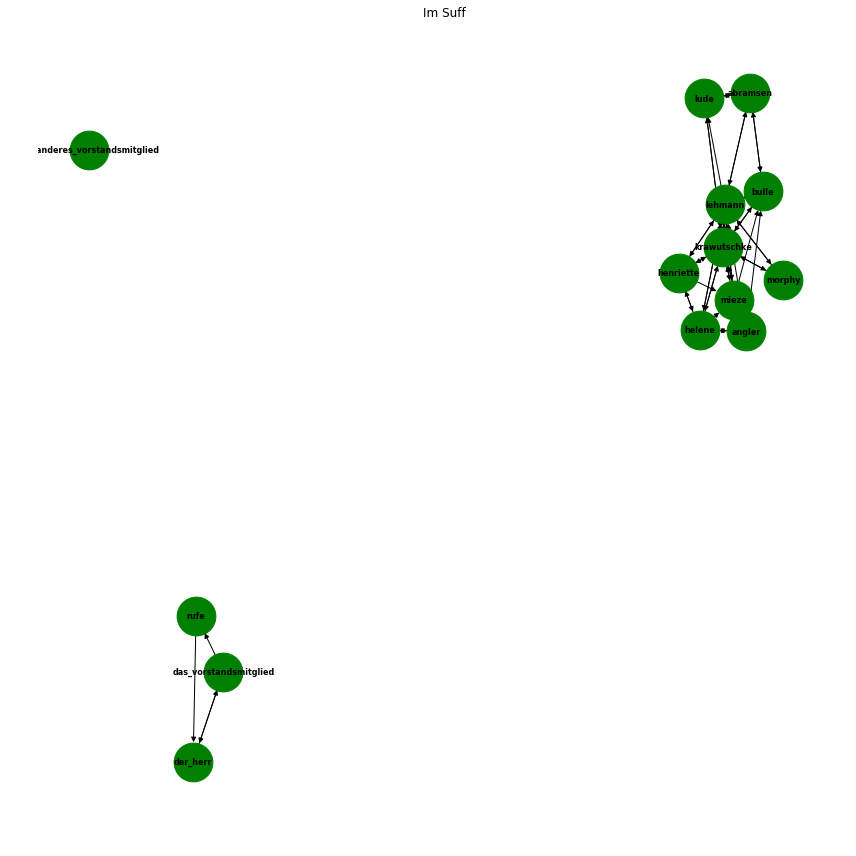

In [182]:
malen(G)